In [1]:
import pandas as pd

In [37]:
# dataframe
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries = countries.set_index('country') # 인덱스 지정
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [38]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Belgium to United Kingdom
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  5 non-null      float64
 1   area        5 non-null      int64  
 2   capital     5 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 160.0+ bytes


---

<div class="alert alert-success">
    <b>EXERCISE</b>: 인구밀도를 의미하는 `density` 칼럼을 추가하세요. (주의: 현재 'population' 칼럼은 100만 단위로 표기되어 있습니다)  
  
</div>

In [31]:
countries = countries.reset_index(drop = False)

In [39]:
countries['density'] = countries.apply(lambda x : x['population']* 1000000/x['area'], axis = 1)

In [40]:
countries

,population,area,capital,density
country,,,,
Belgium,11.3,30510,Brussels,370.370370
France,64.3,671308,Paris,95.783158
Germany,81.3,357050,Berlin,227.699202
Netherlands,16.9,41526,Amsterdam,406.973944
United Kingdom,64.9,244820,London,265.092721


<div class="alert alert-success">
    <b>EXERCISE</b>: 인구밀도가 300을 초과하는 국가(country)의 수도(capital)과 인구(population)을 선택해주세요.  
  
</div>

In [41]:
countries.loc[countries['density'] > 300, ['capital', 'population']]

,capital,population
country,,
Belgium,Brussels,11.3
Netherlands,Amsterdam,16.9


<div class="alert alert-success">
    <b>EXERCISE</b>: 'density_ratio' 칼럼을 추가해주세요. (density_ratio = 인구밀도/평균 인구밀도)
</div>

In [44]:
countries['density']/countries['density'].mean()

country
Belgium           1.355755
France            0.350618
Germany           0.833502
Netherlands       1.489744
United Kingdom    0.970382
Name: density, dtype: float64

In [45]:
countries['density_ratio'] = countries['density']/countries['density'].mean()
countries

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,1.355755
France,64.3,671308,Paris,95.783158,0.350618
Germany,81.3,357050,Berlin,227.699202,0.833502
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,London,265.092721,0.970382


<div class="alert alert-success">
    <b>EXERCISE</b>: 영국(United Kingdom)의 수도(capital)를 'Cambridge'로 변경해주세요.
</div>

In [50]:
countries.loc[countries.index == "United Kingdom", 'capital'] = 'Cambridge'
countries

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,1.355755
France,64.3,671308,Paris,95.783158,0.350618
Germany,81.3,357050,Berlin,227.699202,0.833502
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


<div class="alert alert-success">
    <b>EXERCISE</b>: 인구 밀도가 100 초과, 300 미만인 국가들을 표시해주세요.  
</div>

In [52]:
countries.loc[(countries['density'] > 100) & (countries['density'] < 300)]

,population,area,capital,density,density_ratio
country,,,,,
Germany,81.3,357050,Berlin,227.699202,0.833502
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


<div class="alert alert-success">
    <b>EXERCISE</b>: 수도가 7글자 이상인 국가들을 표시해주세요. (힌트: string의 len( )를 사용하세요.)
</div>

In [83]:
countries[countries['capital'].str.len() >= 7]

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,1.355755
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


<div class="alert alert-success">
    <b>EXERCISE</b>: 수도에 'am' 이 포함되는 국가들을 표시해주세요. (힌트: string의 contains( )를 사용하세요.)
</div>

In [81]:
countries[countries['capital'].str.contains('am')]

,population,area,capital,density,density_ratio
country,,,,,
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


# 영화리뷰 데이터에서 자료 찾기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
df = pd.read_csv('./data/movie_title_data.tsv', sep="\t")

C:\Users\5-08\AppData\Local\Temp\ipykernel_7096\3631726944.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/movie_title_data.tsv', sep="\t")


In [106]:
df.head(11)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,short,Miss Jerry,Miss Jerry,0,1894,\N,40,"Romance,Short"
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8407399 entries, 0 to 8407398
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 577.3+ MB


In [116]:
df['startYear'] = df.apply(lambda x : str(x['startYear']), axis = 1)

In [117]:
df['isAdult'] = df.apply(lambda x : str(x['isAdult']), axis = 1)

<div class="alert alert-success">
    <b>EXERCISE</b>: titles 데이터프레임에는 몇 개의 영화가 기록되어 있나요?
</div>

In [96]:
8407399

8407399

<div class="alert alert-success">
    <b>EXERCISE</b>: titles에서 가장 빠른 시기에 제작된 영화 두 개를 표시하세요.  힌트: .sort_values()
</div>

In [119]:
df.sort_values(by = 'startYear').head(2)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
5329521,tt3155794,short,Passage de Venus,Passage de Venus,0,1874,\N,1,"Documentary,Short"
3488807,tt14495706,short,La Rosace Magique,La Rosace Magique,0,1877,\N,1,"Animation,Short"


<div class="alert alert-success">
    <b>EXERCISE</b>: 제목(title)이 "Hamlet"인 영화는 몇 개가 있나요?
</div>

In [121]:
df[df['originalTitle'] == 'Hamlet']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
594,tt0000598,short,"Hamlet, Prince of Denmark",Hamlet,0,1907,\N,10,"Drama,Short"
876,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,\N,Drama
1228,tt0001240,movie,Hamlet,Hamlet,0,1911,\N,\N,Drama
1229,tt0001241,short,Hamlet,Hamlet,0,1910,\N,20,"Drama,Short"
1230,tt0001242,short,Hamlet,Hamlet,0,1908,\N,\N,"Drama,Short"
...,...,...,...,...,...,...,...,...,...
7347169,tt7656792,tvEpisode,Hamlet,Hamlet,0,2017,\N,\N,Animation
7413345,tt7798632,movie,Hamlet,Hamlet,0,\N,\N,\N,Comedy
7476376,tt7934018,tvMovie,Hamlet,Hamlet,0,1983,\N,\N,Drama
7609545,tt8219328,tvMovie,Hamlet,Hamlet,0,2018,\N,191,Drama


<div class="alert alert-success">
    <b>EXERCISE</b>: 제목(title)이 "Treasure Island"인 영화를 제작년도(year)의 오름차순에 따라 표시하세요
</div>

In [122]:
df[df['originalTitle'] == 'Treasure Island'].sort_values(by = 'startYear')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
2511,tt0002538,short,Treasure Island,Treasure Island,0,1912,\N,\N,"Adventure,Short"
5032142,tt2440348,short,Treasure Island,Treasure Island,0,1913,\N,\N,"Short,Thriller"
9589,tt0009721,movie,Treasure Island,Treasure Island,0,1917,\N,60,Adventure
11620,tt0011785,movie,Treasure Island,Treasure Island,0,1920,\N,76,Adventure
25459,tt0025907,movie,Treasure Island,Treasure Island,0,1934,\N,110,"Adventure,Family"
...,...,...,...,...,...,...,...,...,...
1431503,tt10815740,tvEpisode,Treasure Island,Treasure Island,0,2019,\N,\N,Comedy
3809301,tt15075064,tvEpisode,Treasure Island,Treasure Island,0,2021,\N,\N,"Animation,Comedy"
4323630,tt1659339,movie,Treasure Island,Treasure Island,0,\N,\N,\N,Adventure
7838572,tt8709864,tvSeries,Treasure Island,Treasure Island,0,\N,\N,\N,Reality-TV


<div class="alert alert-success">
    <b>EXERCISE</b>: 1590년에서 1959년 사이 몇 개의 영화가 만들어졌나요?(1950 <= 제작년도 <= 1959)
</div>

In [124]:
df[(df['startYear'] >= '1950') & (df['startYear'] <= '1959')]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
21275,tt0021617,movie,Arizona Territory,Arizona Territory,0,1950,\N,56,"Action,Adventure,Western"
21712,tt0022064,movie,Lebbra bianca,Lebbra bianca,0,1951,\N,100,Drama
25117,tt0025557,movie,El negro que tenía el alma blanca,El negro que tenía el alma blanca,0,1951,\N,87,"Drama,Musical"
30454,tt0030998,movie,You're Only Young Twice,You're Only Young Twice,0,1952,\N,81,Comedy
31048,tt0031603,movie,Made in Germany - Die dramatische Geschichte d...,Made in Germany,0,1957,\N,101,"Biography,Drama"
...,...,...,...,...,...,...,...,...,...
8406493,tt9914920,tvEpisode,"Morey Amsterdam, Charles Dingle","Morey Amsterdam, Charles Dingle",0,1951,\N,\N,Music
8406548,tt9915032,tvEpisode,"Morey Amsterdam, Wally Brown, Ilona Massey","Morey Amsterdam, Wally Brown, Ilona Massey",0,1952,\N,\N,Music
8406554,tt9915048,tvEpisode,"Morey Amsterdam, Sarah Churchill","Morey Amsterdam, Sarah Churchill",0,1951,\N,\N,Music
8406559,tt9915058,tvEpisode,"Morey Amsterdam, Wally Brown, Rosemary Clooney...","Morey Amsterdam, Wally Brown, Rosemary Clooney...",0,1952,\N,\N,Music


# 타이타닉 자료에서 그룹별 연산하기

In [125]:
titanic = pd.read_csv('http://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv')

In [126]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<div class="alert alert-success">
    <b>EXERCISE</b>: groupby()를 사용하여 각 성별(sex)의 평균 나이(age)를 구하세요.
</div>

In [132]:
titanic.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: 전체 승객(passenger)의 평균 생존율을 구하세요.
</div>

In [136]:
titanic['Survived'].sum()/titanic['PassengerId'].max()*100

38.38383838383838

<div class="alert alert-success">
    <b>EXERCISE</b>: 25세 이하 승객의 생존율을 구하세요. (힌트: 불리언 인덱싱)
</div>

In [142]:
titanic[titanic['Age'] <= 25]['Survived'].sum()/len(titanic[titanic['Age'] <= 25]) * 100

41.19601328903654

<div class="alert alert-success">
    <b>EXERCISE</b>: 남성의 생존율을 구하세요. 여성의 생존율을 구하세요. (힌트: 불리언 인덱싱)
</div>

In [147]:
titanic[titanic['Sex'] == 'male']['Survived'].sum()/len(titanic[titanic['Sex'] == 'male']) * 100

18.890814558058924

In [148]:
titanic[titanic['Sex'] == 'female']['Survived'].sum()/len(titanic[titanic['Sex'] == 'female']) * 100

74.20382165605095

<div class="alert alert-success">
    <b>EXERCISE</b>: 생존율을 구하는 함수가 작성되어 있습니다. 성별 생존율을 groupby를 활용해 구하기 위해 ?부분을 알맞게 채워주세요.
</div>

In [145]:
def survival_ratio(survived) :
    return survived.sum() / len(survived)

In [146]:
titanic.groupby('Sex')['Survived'].aggregate(survival_ratio)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [154]:
titanic.groupby('Sex')['Survived'].agg(['min', 'max', 'mean'])

,min,max,mean
Sex,,,
female,0,1,0.742038
male,0,1,0.188908


<div class="alert alert-success">
    <b>EXERCISE</b>: 'Pclass'별로 생존율을 보기 위해 bar 차트를 그리고자 합니다. ?부분을 알맞게 채워서 bar 차트를 그려주세요.
</div>

In [152]:
import matplotlib.pyplot as plt

<Axes: xlabel='Pclass,Survived'>

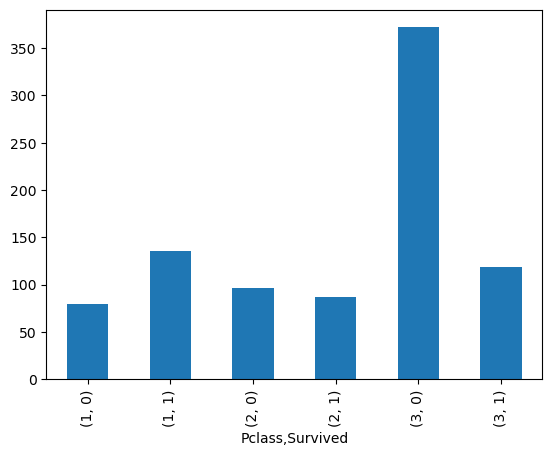

In [153]:
titanic.groupby('Pclass')['Survived'].value_counts(sort=False).plot(kind = 'bar')

<Axes: xlabel='Pclass'>

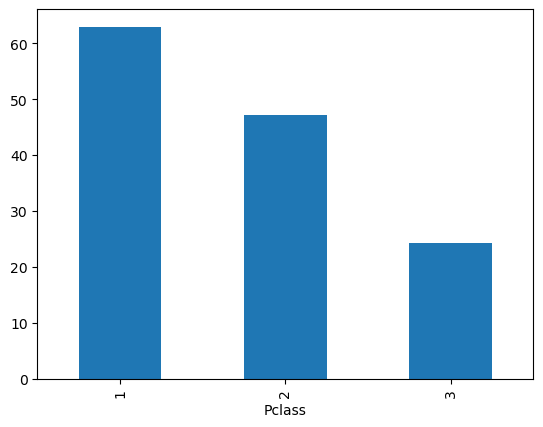

In [157]:
(titanic.groupby('Pclass')['Survived'].mean()*100).plot(kind = 'bar')